In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [20]:
#Data 
cols = ["wavelength", "intensity"]
raw_data1 = pd.read_csv("DataFiles/Malcolm's Phone 1_300_900_nm_run_night_time.txt", delimiter="\t", names=cols)
raw_data2 = pd.read_csv("DataFiles/Malcolm's Phone 1_300_900_nm_run_1.txt", delimiter="\t", names=cols)


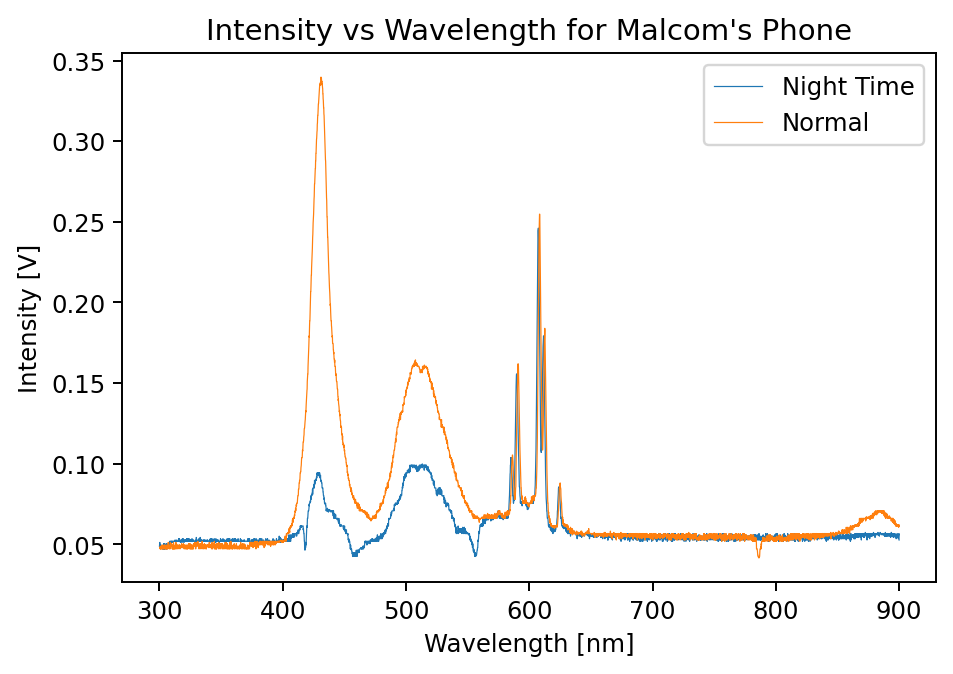

In [23]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Malcom's Phone")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(raw_data1["wavelength"], raw_data1["intensity"], lw=.5, label="Night Time")
plt.plot(raw_data2["wavelength"], raw_data2["intensity"], lw=.5, label="Normal")
plt.legend()

plt.show()

In [24]:
#Data 
cols = ["wavelength", "intensity"]
phil_raw_data1 = pd.read_csv("DataFiles/phils_phone_max_300_900_nm_run_1.txt", delimiter="\t", names=cols)
phil_raw_data2 = pd.read_csv("DataFiles/phils_phone_half_300_900_nm_run_1.txt", delimiter="\t", names=cols)
phil_raw_data3 = pd.read_csv("DataFiles/phils_phone_min_300_900_nm_run_1.txt", delimiter="\t", names=cols)



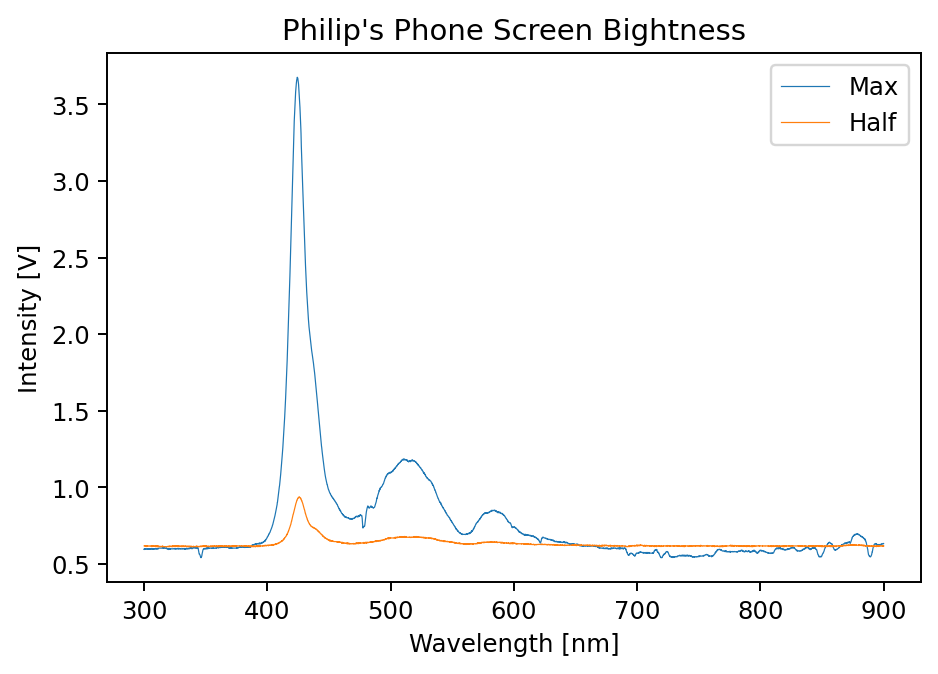

In [33]:
plt.figure(dpi=175)
plt.title("Philip's Phone Screen Bightness")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(phil_raw_data1["wavelength"], phil_raw_data1["intensity"], lw=.5, label="Max")
plt.plot(phil_raw_data2["wavelength"], phil_raw_data2["intensity"], lw=.5, label="Half")
#plt.plot(phil_raw_data3["wavelength"], phil_raw_data3["intensity"], lw=.5, label="Min")

plt.legend()

plt.show()

[1.31132605e+00 4.29962534e+02 1.29766925e+01 1.87078821e+00
 4.23866437e+02 4.63016044e+00 5.73846705e-01 5.12142357e+02
 2.49328750e+01 2.30287743e-01 5.87992195e+02 1.55817665e+01
 5.98943653e-01]
[0.00842836 0.05900759 0.04638464 0.00908825 0.01712422 0.02317345
 0.00226326 0.11091125 0.12998779 0.00266727 0.22256792 0.23238323
 0.00075503]
[0.64273562 0.01372389 0.35744582 0.4857979  0.00404    0.50048904
 0.39440163 0.02165633 0.52135097 1.15823547 0.03785219 1.49137921
 0.12605978]


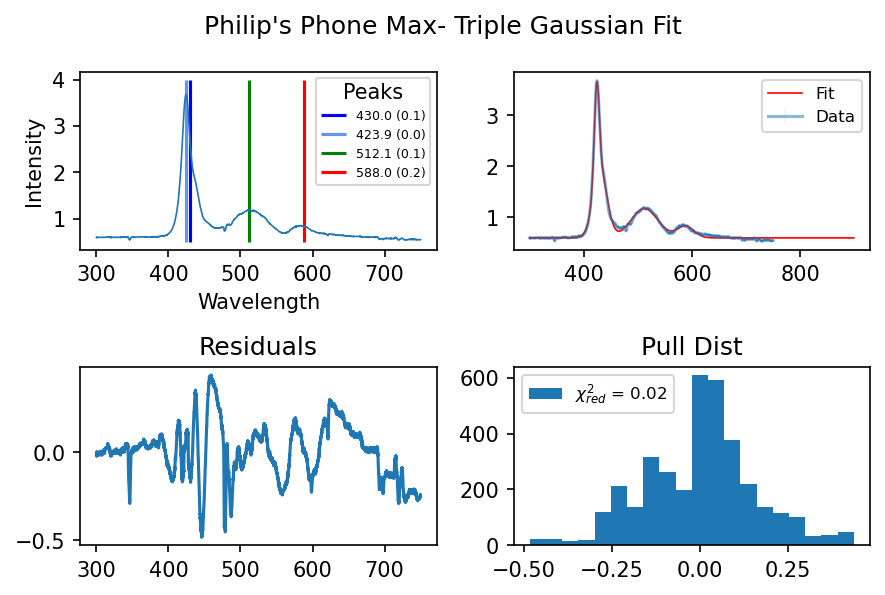

CPU times: user 894 ms, sys: 50.9 ms, total: 945 ms
Wall time: 1.01 s


In [62]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def triple_Gauss(x, A,mu1,sig1, Ab,mu1b,sig1b, B,mu2,sig2, C,mu3,sig3, d): 
    return A*gauss(x,mu1,sig1) + Ab*gauss(x,mu1b,sig1b) + B*gauss(x,mu2,sig2) + C*gauss(x,mu3,sig3) + d

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Philip's Phone Max- Triple Gaussian Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

keeps = phil_raw_data1["wavelength"] < 750

wavelength = phil_raw_data1["wavelength"][keeps]
intensity = phil_raw_data1["intensity"][keeps]

plt.plot(wavelength, intensity, lw=.8)

errors = intensity.values*0 + .2

pars, cov = scipy.optimize.curve_fit(triple_Gauss, wavelength.values, intensity.values, #maxfev=3*10**5, sigma=errors,
                                     p0=[1,420,50, 1,430,50, 1,500,50, 1,580,15, .2],
                                     bounds=([0.01,400,1, 0.01,420,1, 0.01,480,1, 0.1,570,5, 0],
                                             [5,450,200, 5,480,200, 5,520,400, 5,600,50, .8]))
#Mean Lines
plt.vlines(pars[1],0.5,4.0, label=f"{pars[1]:.1f} ({np.sqrt(cov.diagonal())[1]:.1f})", color="blue")
plt.vlines(pars[4],0.5,4.0, label=f"{pars[4]:.1f} ({np.sqrt(cov.diagonal())[4]:.1f})", color="cornflowerblue")
plt.vlines(pars[7],0.5,4.0, label=f"{pars[7]:.1f} ({np.sqrt(cov.diagonal())[7]:.1f})", color="green")
plt.vlines(pars[10],0.5,4.0, label=f"{pars[10]:.1f} ({np.sqrt(cov.diagonal())[10]:.1f})", color="red")

plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(300,900,1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(wavelength.values, 
             intensity.values, yerr=errors/10, ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, triple_Gauss(x, *pars), color="red", lw=.8, label="Fit")
plt.legend(prop={"size":8})
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (intensity.values-triple_Gauss(wavelength.values, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(wavelength.values, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/Phil_Phone_Max.pdf")
plt.show()

In [29]:
#Data 
cols = ["wavelength", "intensity"]
phil_night1 = pd.read_csv("DataFiles/phils_phone_Max_Blue_Light_thin_slit_300_900_nm_run_1.txt", delimiter="\t", names=cols)
phil_night2 = pd.read_csv("DataFiles/phils_phone_max_300_900_nm_run_1.txt", delimiter="\t", names=cols)



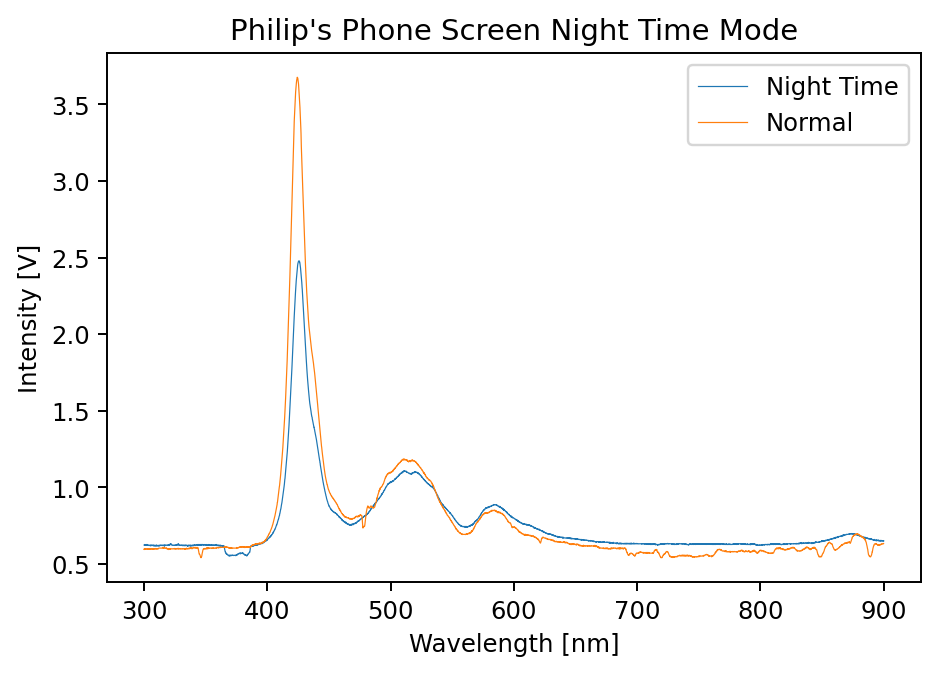

In [31]:
plt.figure(dpi=175)
plt.title("Philip's Phone Screen Night Time Mode")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

plt.plot(phil_night1["wavelength"], phil_night1["intensity"], lw=.5, label="Night Time")
plt.plot(phil_night2["wavelength"], phil_night2["intensity"], lw=.5, label="Normal")
#plt.plot(phil_raw_data3["wavelength"], phil_raw_data3["intensity"], lw=.5, label="Min")

plt.legend()

plt.show()